## Import Dependencies for Cleaning Data & Building Charts

In [1]:
#Import dependencies 
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.lines as mlines

## Adding in the Data

In [3]:
#Read in data files
filepath = os.path.join('resources', 'WDIData.csv')
wdi_data_df = pd.read_csv(filepath, header=0)

filepath = os.path.join('resources', 'indicator_df.csv')
indicator_df = pd.read_csv(filepath, header=0)

filepath = os.path.join('resources','HDI_df.csv')
hdi_df = pd.read_csv(filepath)

filepath = filepath = os.path.join('resources','undp_hdr_education-index.csv')
edu_index_df = pd.read_csv(filepath)

filepath = filepath = os.path.join('resources','undp_hdr_gender-inequality-index.csv')
gii_df = pd.read_csv(filepath)

filepath= os.path.join('resources', 'WDISeries.csv')
series_df = pd.read_csv(filepath, header=0)

## Cleaning the Data
### Datasets included:
 - The World Bank's World Development Indicators Data
 - United Nations Development Program Human Development Reports
   - Human Development Index
   - Education Index
   - Gender

In [4]:
#Pull all in all indicicators from 1990-2019
full_ind_1990_2019 = wdi_data_df[["Country Name","Country Code","Indicator Name","Indicator Code",
                                  "1990","1991","1992","1993","1994","1995","1996","1997","1998","1999",
                                  "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009",
                                  "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]]

In [5]:
#Reformat years from columns to rows
full_ind_reformatted = pd.melt(full_ind_1990_2019, id_vars =["Country Name","Country Code","Indicator Name","Indicator Code"], 
                               value_vars=["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999",
                                           "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009",
                                           "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]) 

In [6]:
#Drop all NaN from full 1990-2019 dataset 
ind_nan_dropped = full_ind_reformatted.dropna()
ind_nan_dropped_renamed = ind_nan_dropped.rename(columns={"Country Name":"country_name","Country Code":"country_code","Indicator Name":"indicator_name","Indicator Code":"indicator_code","variable":"year"})

In [7]:
#Read in indicator topic data
code_topics_df = series_df[["Series Code","Topic"]]
code_topics_renamed = code_topics_df.rename(columns={"Series Code":"series_code","Topic":"topic"})

In [8]:
#Merge indicators and topics
indicators_and_topics = pd.merge(ind_nan_dropped_renamed, code_topics_renamed, left_on = ["indicator_code"], right_on=["series_code"])
indicators_and_topics.head()

,country_name,country_code,indicator_name,indicator_code,year,value,series_code,topic
0,Arab World,ARB,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,1642.330558,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
1,Caribbean small states,CSS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,2346.020996,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
2,Early-demographic dividend,EAR,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,733.593753,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
3,East Asia & Pacific,EAS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,2112.948079,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
4,East Asia & Pacific (excluding high income),EAP,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,347.860363,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...


In [9]:
#Reformat the HDI dataframe
hdi_reformatted = pd.melt(hdi_df, id_vars =["Country"], 
                               value_vars=["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999",
                                           "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009",
                                           "2010","2011","2012","2013","2014","2015","2016","2017","2018"]) 
hdi_reformatted.head()

,Country,variable,value
0,Afghanistan,1990,0.298
1,Albania,1990,0.644
2,Algeria,1990,0.578
3,Andorra,1990,..
4,Angola,1990,..


In [10]:
#Merge primary indicators and HDI
indicators_hdi = pd.merge(indicators_and_topics, hdi_reformatted, left_on = ["country_name", "year"], right_on=["Country", "variable"])
indicators_hdi.head()

,country_name,country_code,indicator_name,indicator_code,year,value_x,series_code,topic,Country,variable,value_y
0,South Asia,SAS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,319.819260,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...,South Asia,1990,0.441
1,South Asia,SAS,Adjusted savings: net national savings (% of GNI),NY.ADJ.NNAT.GN.ZS,1990,12.673175,NY.ADJ.NNAT.GN.ZS,Economic Policy & Debt: National accounts: Adj...,South Asia,1990,0.441
2,South Asia,SAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1990,103.355412,SP.ADO.TFRT,Health: Reproductive health,South Asia,1990,0.441
3,South Asia,SAS,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1990,74.691545,SP.POP.DPND,Health: Population: Dynamics,South Asia,1990,0.441
4,South Asia,SAS,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1990,6.553456,SP.POP.DPND.OL,Health: Population: Dynamics,South Asia,1990,0.441


In [11]:
indicators_hdi_dropped = indicators_hdi.drop(["series_code","Country", "variable"], axis=1)
indicators_hdi_renamed = indicators_hdi_dropped.rename(columns={"value_x":"value","value_y":"hdi"})
indicators_hdi_renamed["category"] = indicators_hdi_renamed["topic"].str.split(':').str[0]
indicators_hdi_renamed["subcategory"] = indicators_hdi_renamed["topic"].str.split(':').str[1]
indicators_hdi_renamed.head()

,country_name,country_code,indicator_name,indicator_code,year,value,topic,hdi,category,subcategory
0,South Asia,SAS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,319.819260,Economic Policy & Debt: National accounts: Adj...,0.441,Economic Policy & Debt,National accounts
1,South Asia,SAS,Adjusted savings: net national savings (% of GNI),NY.ADJ.NNAT.GN.ZS,1990,12.673175,Economic Policy & Debt: National accounts: Adj...,0.441,Economic Policy & Debt,National accounts
2,South Asia,SAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1990,103.355412,Health: Reproductive health,0.441,Health,Reproductive health
3,South Asia,SAS,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1990,74.691545,Health: Population: Dynamics,0.441,Health,Population
4,South Asia,SAS,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1990,6.553456,Health: Population: Dynamics,0.441,Health,Population


In [17]:
twb_wdi_indicators_final = indicators_hdi_renamed[["country_name","country_code","indicator_name","indicator_code","topic","category","subcategory","year","value","hdi"]]
twb_wdi_indicators_final.head()

,country_name,country_code,indicator_name,indicator_code,topic,category,subcategory,year,value,hdi
0,South Asia,SAS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...,Economic Policy & Debt,National accounts,1990,319.819260,0.441
1,South Asia,SAS,Adjusted savings: net national savings (% of GNI),NY.ADJ.NNAT.GN.ZS,Economic Policy & Debt: National accounts: Adj...,Economic Policy & Debt,National accounts,1990,12.673175,0.441
2,South Asia,SAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Health: Reproductive health,Health,Reproductive health,1990,103.355412,0.441
3,South Asia,SAS,Age dependency ratio (% of working-age populat...,SP.POP.DPND,Health: Population: Dynamics,Health,Population,1990,74.691545,0.441
4,South Asia,SAS,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,Health: Population: Dynamics,Health,Population,1990,6.553456,0.441


In [18]:
#Pull out just the WDI values
wdi_values = twb_wdi_indicators_final[["country_name","indicator_name","year","value","hdi"]]
wdi_values.head()

,country_name,indicator_name,year,value,hdi
0,South Asia,Adjusted net national income per capita (curre...,1990,319.819260,0.441
1,South Asia,Adjusted savings: net national savings (% of GNI),1990,12.673175,0.441
2,South Asia,"Adolescent fertility rate (births per 1,000 wo...",1990,103.355412,0.441
3,South Asia,Age dependency ratio (% of working-age populat...,1990,74.691545,0.441
4,South Asia,"Age dependency ratio, old (% of working-age po...",1990,6.553456,0.441


In [19]:
#Select the relevent columns from the Gender Inequality Index dataframe
gii_2014_2018 = gii_df[["Country","2014","2015","2016","2017","2018"]]

#Add column for indicator name
gii_2014_2018["indicator_name"] = "Gender Inequality Index"

#Pull out space from Country column values
gii_2014_2018["country_name"] = gii_2014_2018["Country"].str.split(" ").str[1]

/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
#Pivot years
gii_2014_2018_pivot = pd.melt(gii_2014_2018, id_vars =["country_name","indicator_name"], 
                               value_vars=["2014","2015","2016","2017","2018"])

In [21]:
#Add in HDI
gii_hdi_combined = pd.merge(gii_2014_2018_pivot, hdi_reformatted, how="left",
                            left_on=["country_name", "variable"], 
                            right_on=["Country", "variable"])

In [22]:
#Rename columns
gii_hdi_renamed = gii_hdi_combined.rename(columns={"variable":"year", "value_x":"value","value_y":"hdi"})

#Select final dataframe columns
gii_hdi = gii_hdi_renamed[["country_name","indicator_name","year","value","hdi"]]

#Preview GII dataframe
gii_hdi.head()

,country_name,indicator_name,year,value,hdi
0,Afghanistan,Gender Inequality Index,2014,0.623,0.488
1,Albania,Gender Inequality Index,2014,0.261,0.787
2,Algeria,Gender Inequality Index,2014,0.439,0.749
3,Angola,Gender Inequality Index,2014,0.577,0.557
4,Argentina,Gender Inequality Index,2014,0.365,0.825


In [23]:
#Select the relevent columns from the Gender Inequality Index dataframe
ei_2014_2018 = edu_index_df[["Country","2014","2015","2016","2017","2018"]]

#Add column for indicator name
ei_2014_2018["indicator_name"] = "Education Index"

#Pull out space from Country column values
ei_2014_2018["country_name"] = ei_2014_2018["Country"].str.split(" ").str[1]

/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
#Pivot years
ei_2014_2018_pivot = pd.melt(ei_2014_2018, id_vars =["country_name","indicator_name"], 
                               value_vars=["2014","2015","2016","2017","2018"])

In [25]:
#Add in HDI
ei_hdi_combined = pd.merge(ei_2014_2018_pivot, hdi_reformatted, how="left",
                            left_on=["country_name", "variable"], 
                            right_on=["Country", "variable"])

In [26]:
#Rename columns
ei_hdi_renamed = ei_hdi_combined.rename(columns={"variable":"year", "value_x":"value","value_y":"hdi"})

#Select final dataframe columns
ei_hdi = ei_hdi_renamed[["country_name","indicator_name","year","value","hdi"]]

#Preview GII dataframe
ei_hdi.head()

,country_name,indicator_name,year,value,hdi
0,Afghanistan,Education Index,2014,0.403,0.488
1,Albania,Education Index,2014,0.774,0.787
2,Algeria,Education Index,2014,0.662,0.749
3,Andorra,Education Index,2014,0.715,0.853
4,Angola,Education Index,2014,0.46,0.557


In [27]:
#Create combined indicators dataframe from both WDI and UNDP datasets
all_indicators = [wdi_values, gii_hdi, ei_hdi]
combined_indicators = pd.concat(all_indicators)

#Drop ".." rows
dropped_non_float = combined_indicators[combined_indicators.value != ".."]
dropped_non_float = dropped_non_float[dropped_non_float.hdi != ".."]

#Asign value and hdi columns as floats
dropped_non_float["value"] = dropped_non_float["value"].astype(float)
dropped_non_float["hdi"] = dropped_non_float["hdi"].astype(float)
dropped_non_float.head()

,country_name,indicator_name,year,value,hdi
0,South Asia,Adjusted net national income per capita (curre...,1990,319.819260,0.441
1,South Asia,Adjusted savings: net national savings (% of GNI),1990,12.673175,0.441
2,South Asia,"Adolescent fertility rate (births per 1,000 wo...",1990,103.355412,0.441
3,South Asia,Age dependency ratio (% of working-age populat...,1990,74.691545,0.441
4,South Asia,"Age dependency ratio, old (% of working-age po...",1990,6.553456,0.441


In [28]:
combined_indicators_final = dropped_non_float
combined_indicators_final.dtypes

country_name       object
indicator_name     object
year               object
value             float64
hdi               float64
dtype: object

## Working with Primary Indicators 
Indicators tracked by the most countries over the most years

In [29]:
#Pull out primary indicators for initial charts
primary_indicators = combined_indicators_final[combined_indicators_final['indicator_name'].isin([
                                        "Population, total",
                                        "Agriculture, forestry, and fishing, value added (% of GDP)",
                                        "Life expectancy at birth, total (years)",
                                        "GDP (current US$)",
                                        "Employers, total (% of total employment) (modeled ILO estimate)"]) ]
primary_indicators.head()

filepath = os.path.join('resources','primary_indcicators.csv')
primary_indicators.to_csv(filepath)

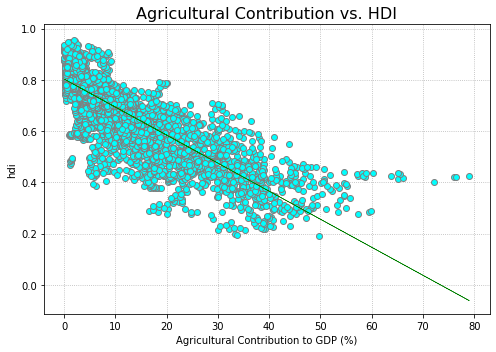

0.6693471279084982


In [30]:
#Create Agricultural v. HDI chart

agri_values = primary_indicators.loc[(primary_indicators['indicator_name']=='Agriculture, forestry, and fishing, value added (% of GDP)')]

# defining variables
x = agri_values['value']
y = agri_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Agricultural Contribution to GDP (%)')
plt.ylabel('hdi')
plt.title("Agricultural Contribution vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Agriculture_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)


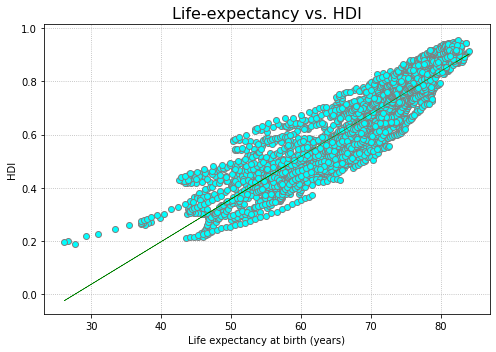

0.8358149986317633


In [31]:
#Create Life Expectancy v. HDI chart

life_values = primary_indicators.loc[(primary_indicators['indicator_name']=='Life expectancy at birth, total (years)')]

# defining variables
x = life_values['value']
y = life_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('HDI')
plt.title("Life-expectancy vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Life-expectancy_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

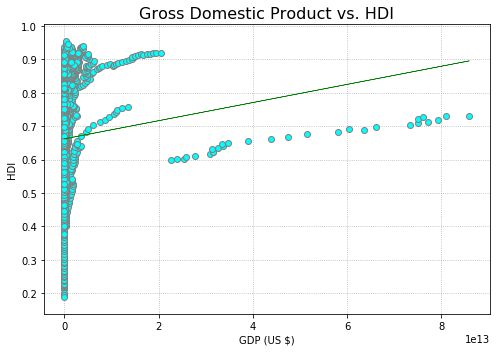

0.0056415910282771485


In [32]:
#Create GDP v. HDI chart

gdp_values = primary_indicators.loc[(primary_indicators['indicator_name']=='GDP (current US$)')]

# defining variables
x = gdp_values['value']
y = gdp_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('GDP (US $)')
plt.ylabel('HDI')
plt.title("Gross Domestic Product vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'GDP_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

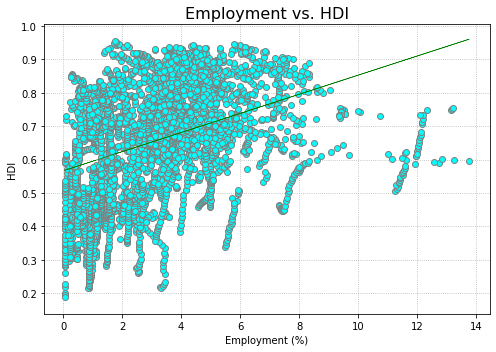

0.1437001490543193


In [33]:
#Create Employment v. HDI chart

employment_values = primary_indicators.loc[(primary_indicators['indicator_name']=='Employers, total (% of total employment) (modeled ILO estimate)')]

# defining variables
x = employment_values['value']
y = employment_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Employment (%)')
plt.ylabel('HDI')
plt.title("Employment vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Employment_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

## Working with Secondary Indicators

In [35]:
#Pull out primary indicators for initial charts
secondary_indicators_education = combined_indicators_final[combined_indicators_final['indicator_name'].isin([
                                        "Education Index",
                                        "Labor force with basic education (% of total working-age population with basic education)",
                                        "Labor force with intermediate education (% of total working-age population with intermediate education)",
                                        "Labor force with advanced education (% of total working-age population with advanced education)",
                                        "Government expenditure on education, total (% of GDP)",
                                        "Literacy rate, adult total (% of people ages 15 and above)"]) ]
secondary_indicators_education.head()

filepath = os.path.join('resources','education_df.csv')
secondary_indicators_education.to_csv(filepath)

In [36]:
secondary_indicators_gender = combined_indicators_final[combined_indicators_final['indicator_name'].isin([
                                        "Gender Inequality Index",
                                        "Labor force, female (% of total labor force)",
                                        "Unemployment, female (% of female labor force) (modeled ILO estimate)"
                                        "School enrollment, primary (gross), gender parity index (GPI)",
                                        "School enrollment, secondary (gross), gender parity index (GPI)",
                                        "School enrollment, tertiary (gross), gender parity index (GPI)",
                                        "Proportion of seats held by women in national parliaments (%)"]) ]
secondary_indicators_gender.head()

filepath = os.path.join('resources','gender_df.csv')
secondary_indicators_gender.to_csv(filepath)

In [37]:
secondary_indicators_access = combined_indicators_final[combined_indicators_final['indicator_name'].isin([
                                        "Mobile cellular subscriptions (per 100 people)",
                                        "Individuals using the Internet (% of population)"
                                        "People using at least basic drinking water services (% of population)",
                                        "Access to clean fuels and technologies for cooking (% of population)",
                                        "Access to electricity (% of population)",
                                        "People using at least basic sanitation services (% of population)"]) ]
secondary_indicators_access.head()

filepath = os.path.join('resources','access_df.csv')
secondary_indicators_access.to_csv(filepath)

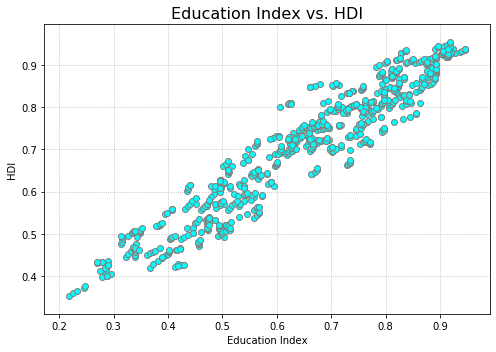

nan


In [38]:
#Create Education Index v. HDI chart

edu_1_values = secondary_indicators_education.loc[(secondary_indicators_education['indicator_name']=='Education Index')]

# defining variables
x = edu_1_values['value']
y = edu_1_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Education Index')
plt.ylabel('HDI')
plt.title("Education Index vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Education_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

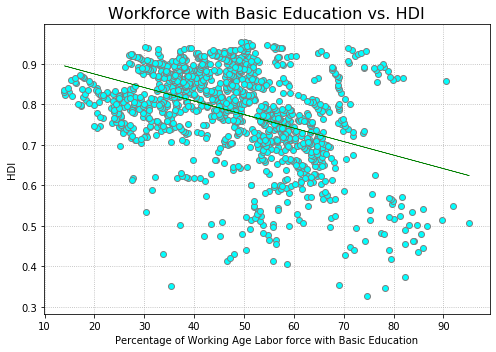

0.17662955254045581


In [39]:
#Create Workforce with Basic Education Index v. HDI chart

edu_2_values = secondary_indicators_education.loc[(secondary_indicators_education['indicator_name']=='Labor force with basic education (% of total working-age population with basic education)')]

# defining variables
x = edu_2_values['value']
y = edu_2_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Percentage of Working Age Labor force with Basic Education')
plt.ylabel('HDI')
plt.title("Workforce with Basic Education vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'WorkForceBasicEducation_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

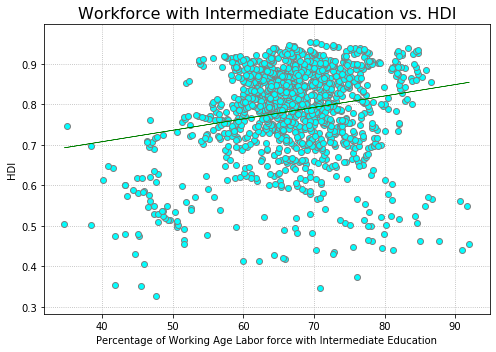

0.04018920790829672


In [40]:
#Create Workforce with Intermediate Education Index v. HDI chart

edu_3_values = secondary_indicators_education.loc[(secondary_indicators_education['indicator_name']=='Labor force with intermediate education (% of total working-age population with intermediate education)')]

# defining variables
x = edu_3_values['value']
y = edu_3_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Percentage of Working Age Labor force with Intermediate Education')
plt.ylabel('HDI')
plt.title("Workforce with Intermediate Education vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'WorkForceIntermediateEducation_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

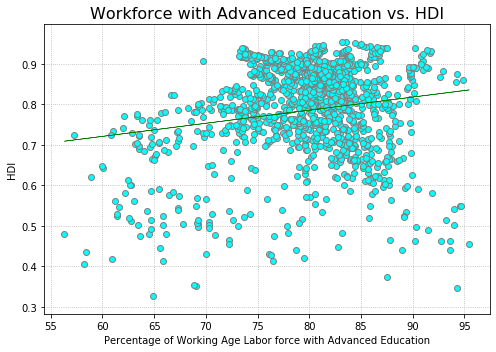

0.03039566300456451


In [41]:
#Create Workforce with Advanced Education Index v. HDI chart

edu_4_values = secondary_indicators_education.loc[(secondary_indicators_education['indicator_name']=='Labor force with advanced education (% of total working-age population with advanced education)')]

# defining variables
x = edu_4_values['value']
y = edu_4_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Percentage of Working Age Labor force with Advanced Education')
plt.ylabel('HDI')
plt.title("Workforce with Advanced Education vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'WorkForceAdvancedEducation_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

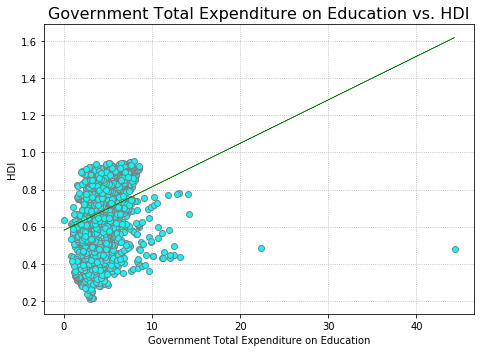

0.07720257184712688


In [42]:
#Create Government Total Expenditure on Education v. HDI chart

edu_5_values = secondary_indicators_education.loc[(secondary_indicators_education['indicator_name']=='Government expenditure on education, total (% of GDP)')]

# defining variables
x = edu_5_values['value']
y = edu_5_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Government Total Expenditure on Education')
plt.ylabel('HDI')
plt.title("Government Total Expenditure on Education vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'ExpenditureEducation_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

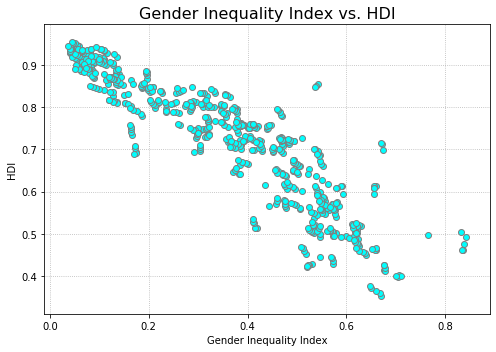

nan


In [43]:
#Create Gender Inequality Index v. HDI chart

gii_1_values = secondary_indicators_gender.loc[(secondary_indicators_gender['indicator_name']=='Gender Inequality Index')]

# defining variables
x = gii_1_values['value']
y = gii_1_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Gender Inequality Index')
plt.ylabel('HDI')
plt.title("Gender Inequality Index vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'GII_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

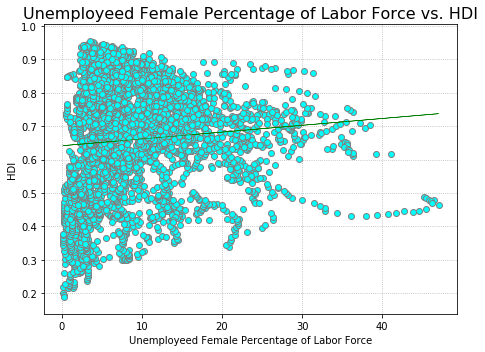

0.007887435987983612


In [29]:
#Create Female Unemployment v. HDI chart

female_unemp_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)')]

# defining variables
x = female_unemp_values['value']
y = female_unemp_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Unemployeed Female Percentage of Labor Force')
plt.ylabel('HDI')
plt.title("Unemployeed Female Percentage of Labor Force vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Female_Unemployment_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)


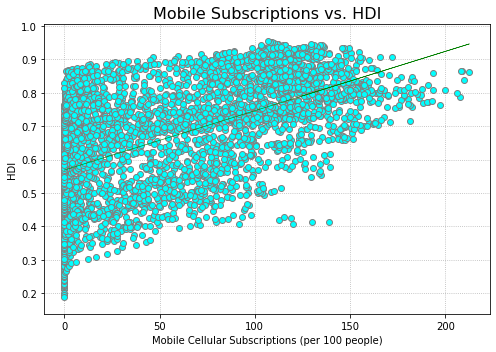

0.30420983418331277


In [30]:
#Create Mobile Subscriptions v. HDI chart

mobile_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='Mobile cellular subscriptions (per 100 people)')]

# defining variables
x = mobile_values['value']
y = mobile_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Mobile Cellular Subscriptions (per 100 people)')
plt.ylabel('HDI')
plt.title("Mobile Subscriptions vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Mobile_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

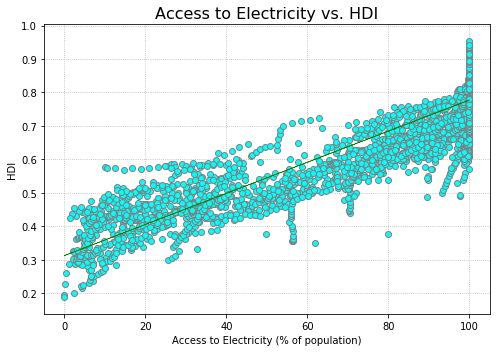

0.7767587502864063


In [31]:
#Create Access to Electricity v. HDI chart

electric_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='Access to electricity (% of population)')]

# defining variables
x = electric_values['value']
y = electric_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Access to Electricity (% of population)')
plt.ylabel('HDI')
plt.title("Access to Electricity vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Electric_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

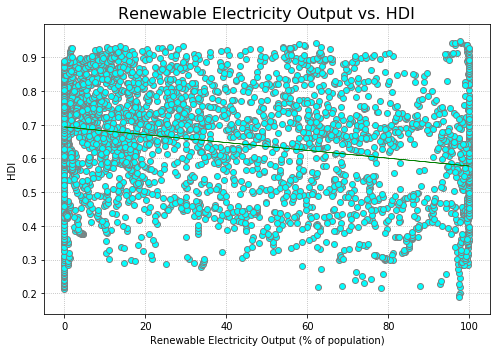

0.056397471826507235


In [32]:
#Create Renewable Electricity v. HDI chart

renewable_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='Renewable electricity output (% of total electricity output)')]

# defining variables
x = renewable_values['value']
y = renewable_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Renewable Electricity Output (% of population)')
plt.ylabel('HDI')
plt.title("Renewable Electricity Output vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Renewable_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

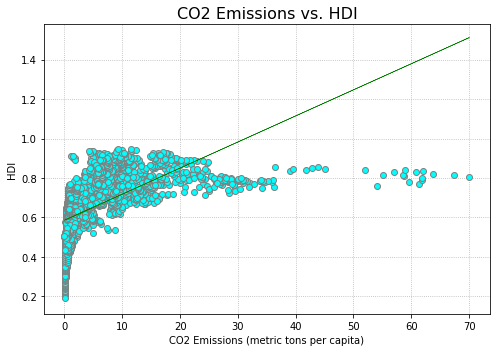

0.3056982843597935


In [33]:
#Create CO2 Emissions v. HDI chart

co2_values = secondary_indicators.loc[(secondary_indicators['indicator_name']=='CO2 emissions (metric tons per capita)')]

# defining variables
x = co2_values['value']
y = co2_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('CO2 Emissions (metric tons per capita)')
plt.ylabel('HDI')
plt.title("CO2 Emissions vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'CO2_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)